# Notebook 1: introduction to Jupyter, numpy and cirq

Throughout this course we will be using Jupyter notebooks. Please read this page to familiarize yourself with them.

## Jupyter notebooks

Jupyter is a useful platform for writing and excecuting code interactively in Python. Jupyter also works with other languages, notably Julia and R. (In fact Jupyter is short for Julia-Python-R). 

With Jupyter notebooks you can write and excecute code piece by piece, and you can also mix code with rich text. The rich text uses Markdown as markup language, and has full support for $\LaTeX$ to write equations. For example, this entire page is itself a Jupyter notebook!

## Google Colab

You can run and edit Jupyter notebooks from your browser without any installation using [Google Colab](https://colab.research.google.com/). You can also click the button `Open in Colab` at the top of this page to open this page itself as a notebook. On Colab all the Python packages you will need will already be installed. The notebooks all run on a server, so it doesn't matter how powerful your computer is. After editing a notebook the most convenient way to save it is by saving it onto Google Drive. If you do not want to do this, you can also download / upload the notebook as a `.ipynb` file.

## Local usage

You can skip this section if you just want to use Jupyter from Colab.

If you want to run Jupyter notebooks on your own computer, you first need to install Python and Jupyter. The easiest way to do this is by downloading [Anaconda](
https://www.anaconda.com/products/individual#Downloads). Anaconda is a Python distribution that already has a large amount of useful packages preinstalled. 

After installing Anaconda you can launch Jupyter as an application. You can also use Anaconda to download and manage packages using a graphical user interface. 

Alternatively, Anaconda can be used from the command line. If you want to do this, then after installing Anaconda, make sure it is properly added to `$PATH`. The easiest way to do this is to run the command
```
conda init
```
On OSX and Linux this command should work. On Windows make sure to run this command from the `Anaconda Prompt` application. 

Then you can launch Jupyter by typing
```
jupter notebook
```
or 
```
jupyter lab
```
(Jupyter lab is a slightly nicer interface, but you might have to install it first)

Note that when you launch Jupyter from a certain folder, it will only have access to that folder and all it's subfolders. To use it in a different folder, first `cd` to the right folder from command line.


Alternatively, some IDEs have great support for Jupyter notebooks. Popular choices are VSCode, Spyder and
Pycharm.

## Introduction to Jupyter, Python and numpy

A Jupyter notebook consists of 'cells'. There are three different types of cells: code, markdown, and raw (which is not as important). This is a markdown cell, and it is used to display rich text.

Below is a code cell, which contains Python code. You can excecute code cells by highlighting it and pressing Shift+Enter or Ctrl+Enter, or by pressing the play icon (▶️) in the user interface. By default the result of the last line of code is always displayed.

In [1]:
x = 2
y = 3

# Computes x-y but it doesn't show the results since it’s not the last line of this cell
x - y

# Displays the result of x+y (i.e. '5')
x + y


5

If we do not want the output of the last line of code to be displayed for some reason, we can end the line with a semicolon (;). For example, the following line does not have any output.

In [2]:
2 + 3


5

All the variables initialized in a code cell are stored, so any subsequent cell has access to them:

In [3]:
x ** 2 + y ** 2


13

The same is true for functions. We can excecute the cell below to define the function `f`.

In [4]:
def f(x):
    return x ** 2


Now we can use it in another cell, using the stored value of `x` from before.

In [5]:
f(x)


4

We can also use Python for plotting using the package `matplotlib.pyplot`. First we'll need to import the package, but after that we can use it in any code cell. 
Below we plot $y=x^2$ using the values of $x$: $\{0,1,2,3,4,5,6,7,8,9\}$.

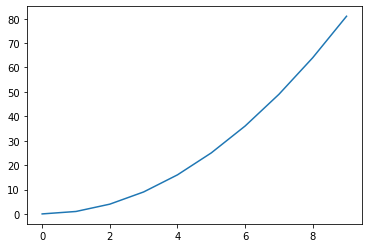

In [6]:
import matplotlib.pyplot as plt

y = [x ** 2 for x in range(10)]
plt.plot(y)


The expression
```python
y = [x**2 for x in range(10)]
```
is an example of Python list comprehension. It is essentially mimicking mathematical set-builder notation:

$$
y = \{x^2 \mid x\in (0,\dots,9)\}
$$

An equivalent way to write the same thing would be
```python
y = []
for x in range(10):
    y.append(x)
```

We can add titles and axis labels to the plot, as well as change it's size. We can also change the style of
the plot below. 

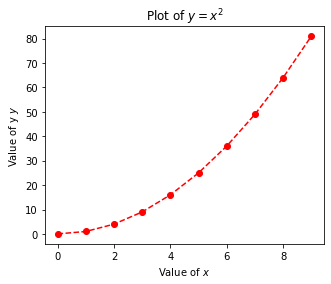

In [7]:
plt.figure(figsize=(5, 4))
plt.title("Plot of $y=x^2$")
plt.xlabel("Value of $x$")
plt.ylabel("Value of y $y$")

y = [x ** 2 for x in range(10)]
plt.plot(y, linestyle="--", color="red", marker="o")


Note that using `range` we can only create sequences of integers. In general, when we're working with arrays we do not want to use the Python standard library, but instead we will use `numpy`. This is a very widely used library for numerics in Python. 

A lot of functions in `numpy` have similar names to equivalent functions in Matlab, so if you're used to Matlab the transition shouldn't be difficult. The biggest difference is that the indices of Matlab arrays start with 1, but in Python they start with 0. 

For example, below we create an array with 10 000 values between -5 and 5.

In [8]:
import numpy as np

x = np.linspace(-5, 5, 10000)
x


array([-5.       , -4.9989999, -4.9979998, ...,  4.9979998,  4.9989999,
        5.       ])

Now `x` is a numpy array. Applying functions to arrays is easy. For example suppose we want to compute

$$y = \exp(-x^2/2)/\sqrt{2\pi}$$

for all these values of `x`, and then plot the result, we can do:

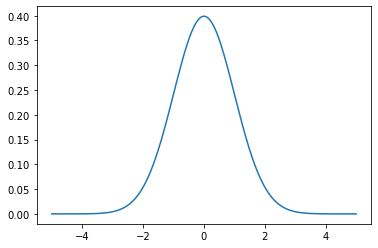

In [9]:
y = np.exp(-(x ** 2) / 2) / np.sqrt(2 * np.pi)

plt.plot(x, y)


Numpy has very good documentation, which you can find [right here](https://numpy.org/doc/1.20/) 

In general for homework exercises where you will need to write code, we will tell you which functions you might need to use. Therefore you don't need to worry if you don't (yet) know how to do something in Python.

## Important tip: restart your runtime

Restart the Jupyter kernel from time to time. On Colab click 'Runtime > Restart runtime'. Sometimes you might accidentally be using a variable you defined earlier, but then removed the code for this variable. This may give unexpected results, so to make sure your code is good execute it again after restarting the runtime. 

Before handing in any homework make sure to restart the runtime and excecute all the cells (Colab: 'Runtime > Restart and run all'). Make sure the output of all the cells is as expected, and that the entire notebook runs without any errors.

### Exercise 1

> Use numpy and matplotlib to plot the function $y = \sin(x)$ with $x\in [-\pi,\pi]$. Use a figure size of `(10,5)`, and plot the line in black.

In [10]:
# YOUR CODE HERE


## Matrices, qubits and complex numbers

We can manually create a `numpy` array by typing out all its entries. For example, below we define the Pauli-X gate,

In [11]:
X = np.array([[0, 1], [1, 0]])


We can apply matrices to vectors using the `@` operator. For example, we can encode the qubit $|0\rangle$ as the array `[1, 0]` and then apply the X gate:

In [12]:
qubit = np.array([1, 0])

X @ qubit


array([0, 1])

The result is the array `[0, 1]`, i.e., the qubit $|1\rangle$. Matrix matrix multiplication works similarly, for example below we see that $X^2 = \operatorname{Id}$

In [13]:
X @ X


array([[1, 0],
       [0, 1]])

Numpy and Python also work with complex numbers. For example, we can apply $X$ to the qubit $(i|0\rangle + |1\rangle)/\sqrt(2)$.

In [14]:
qubit = np.array([1j, 1]) / np.sqrt(2)

X @ qubit


array([0.70710678+0.j        , 0.        +0.70710678j])

Note that the imaginary constant $i$ is denoted by the letter `j` in python. By convention, a number followed by `j`, such as `10j`, is an imaginary number. Note that `j` on it's own is _not_ the imaginary constant $i$, but rather a variable with name `j`. If you want to use the imaginary constant $i$ you should type `1j`. This also applies to variables. For example, Python has no way of knowing whether `aj` is $a\cdot i$ or a variable with name `aj`. Therefore we need to write `a*1j`. 


### Exercise 2

> Define three numpy arrays `Y`, `Z`, `H` of respectively the Pauli-Y, Pauli-Z and Hadamard gate. Use this to show the following relations:  
>
> $Y^2 = \operatorname{Id}$  
> $Z^2 = \operatorname{Id}$  
> $H^2 = \operatorname{Id}$  
> $XYX = -Y$  
> $XZX = -Z$  
> $XHX = (X-Z)/ \sqrt 2$  


To show these equalities we can use `np.allclose(A, B)` which checks if all the entries of `A` and `B` are close to each other with respect to the machine epsilon (which is $\sim 10^{-16}$ for double precision floating point numbers). To get started, we show how you can check whether $X^2=\operatorname{Id}$. Here `np.eye(2)` is the 2x2 identity matrix.

In [15]:
print("Is X^2 = Id?", np.allclose(X @ X, np.eye(2)))

# YOUR CODE HERE

Is X^2 = Id? True


## Cirq

While Numpy can be used to simulate quantum circuits, there are more specialized libraries for this purpose. One such library is `cirq`, developed by Google. Using it, we can easily build quantum circuits and simulate their behavior.

Unfortunately, `cirq` does not seem to come pre-installed on Google colab, so we will have to install it first by running the cell below. If `cirq` is already installed, then this will just import the libary.

In [16]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    print("installed cirq.")
    import cirq

We can create a qubit using `cirq.NamedQubit()`. By convention, qubits are initialized in the sate $|0\rangle$.

We then start by initializing a new circuit using `cirq.Circuit()`. We can then iteratively append gates to the circuit as shown below to create a circuit. 

Below we create the circuit $XHX$, and display it. We end with a measurement.

In [17]:
qubit = cirq.NamedQubit("qubit1")

circuit = cirq.Circuit()
circuit.append(cirq.X(qubit))
circuit.append(cirq.H(qubit))
circuit.append(cirq.X(qubit))
circuit.append(cirq.measure(qubit))

print(circuit)

qubit1: ───X───H───X───M───


Now we can simulate the circuit using a `Simulator` object.

In [18]:
simulator = cirq.Simulator()

result = simulator.run(circuit, repetitions=50)
result

qubit1=01101001111110010110100110011111101001000001001011

We see that the result is just a string of 0's and 1's. This is because when we measure the qubit at the end of the circuit, the amplitude of the $|0\rangle$ and $|1\rangle$ state are equal; therefore we get 0 or 1 as measurement outcome with a 50/50 chance. 

If we want to obtain the state of the qubit at the end of the circuit instead, then we should use the `.simulate` method instead.

In [19]:
result = simulator.simulate(circuit)
result

measurements: qubit1=1
output vector: |1⟩

Now we get either $|1\rangle$ or $-1|0\rangle$ (with equal probability), which is perhaps not what you expected. This is because we still have a measurement operator at the end of the circuit, which will project the state to either $|0\rangle$ or $|1\rangle$. To get the state $XHX|0\rangle$ we need to build a circuit without the measurement operator and then simulate it.

In [20]:
qubit = cirq.NamedQubit("qubit2")

circuit2 = cirq.Circuit()
circuit2.append(cirq.X(qubit))
circuit2.append(cirq.H(qubit))
circuit2.append(cirq.X(qubit))

simulator = cirq.Simulator()
result = simulator.simulate(circuit2)
print(result)

measurements: (no measurements)
output vector: -0.707|0⟩ + 0.707|1⟩


In section §4.2 of Nielsen-Chuang (p.174) we define the operators
$$
\begin{align*}
    R_x(\theta) &= e^{-i\theta X/2}\\
    R_y(\theta) &= e^{-i\theta Y/2}\\
    R_y(\theta) &= e^{-i\theta Z/2}
\end{align*}
$$

These gates are defined in cirq respectively by `cirq.rx(theta)`, `cirq.ry(theta)` and `cirq.rz(theta)`
We can use to show that $X R_y(\theta) X = R_y(-\theta)$ for example (this is exercise 4.7).

### Exercise 3

> Build two circuits, $X R_y(\theta) X$, and $R_y(-\theta)$ for $\theta = \pi/12$. Simulate both circuits and confirm that the resulting state vectors are the same.

In [21]:
# YOUR CODE HERE